In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from datetime import date

In [7]:
start='2010-01-01'
end = date.today().strftime("%Y-%m-%d")
df=data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473096


In [8]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-30,138.369995,133.770004,137.250000,136.720001,98964500.0,136.720001
2022-07-01,139.039993,135.660004,136.039993,138.929993,71007500.0,138.929993
2022-07-05,141.610001,136.929993,137.770004,141.559998,73353800.0,141.559998
2022-07-06,144.119995,141.080002,141.350006,142.919998,73972200.0,142.919998
2022-07-07,145.350006,143.300003,143.289993,145.320007,10513664.0,145.320007


In [9]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473096


In [10]:
df= df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


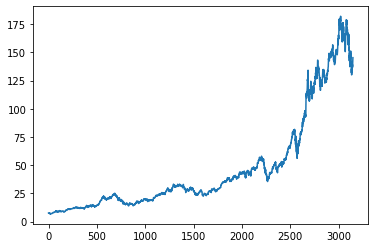

In [11]:
plt.plot(df.Close)

In [12]:
df

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0
...,...,...,...,...,...
3144,138.369995,133.770004,137.250000,136.720001,98964500.0
3145,139.039993,135.660004,136.039993,138.929993,71007500.0
3146,141.610001,136.929993,137.770004,141.559998,73353800.0
3147,144.119995,141.080002,141.350006,142.919998,73972200.0


In [13]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3144    157.224001
3145    156.896701
3146    156.564001
3147    156.230401
3148    155.962401
Name: Close, Length: 3149, dtype: float64

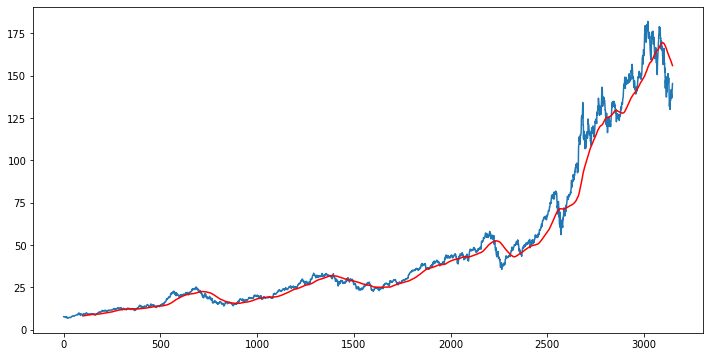

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [15]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3144    158.35600
3145    158.30550
3146    158.26935
3147    158.25365
3148    158.26555
Name: Close, Length: 3149, dtype: float64

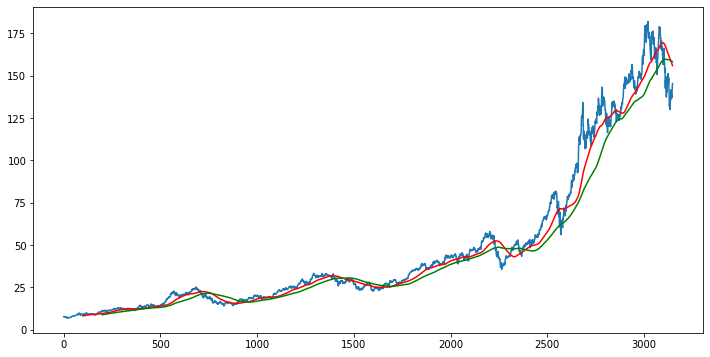

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [17]:
df.shape

(3149, 5)

In [18]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2204, 1)
(945, 1)


In [19]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [20]:
data_testing.head()

,Close
2204,56.997501
2205,56.072498
2206,55.942501
2207,56.717499
2208,54.090000


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.97649459],
       [0.98636588],
       [1.        ]])

In [23]:
data_training_array.shape

(2204, 1)

In [24]:
x_train =[] 
y_train =[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(2104, 100, 1)

In [26]:
#ML model

In [28]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [29]:
model=Sequential()

model.add(LSTM(units = 50, activation= 'relu'  ,return_sequences= True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [31]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs =50)

Epoch 1/50
66/66 [==============================] - 162s 2s/step - loss: 0.0270
Epoch 2/50
66/66 [==============================] - 170s 3s/step - loss: 0.0056
Epoch 3/50
66/66 [==============================] - 189s 3s/step - loss: 0.0050
Epoch 4/50
66/66 [==============================] - 180s 3s/step - loss: 0.0044
Epoch 5/50
66/66 [==============================] - 197s 3s/step - loss: 0.0042
Epoch 6/50
66/66 [==============================] - 212s 3s/step - loss: 0.0039
Epoch 7/50
66/66 [==============================] - 212s 3s/step - loss: 0.0034
Epoch 8/50
66/66 [==============================] - 212s 3s/step - loss: 0.0034
Epoch 9/50
66/66 [==============================] - 211s 3s/step - loss: 0.0039
Epoch 10/50
66/66 [==============================] - 211s 3s/step - loss: 0.0034
Epoch 11/50
66/66 [==============================] - 210s 3s/step - loss: 0.0033
Epoch 12/50
66/66 [==============================] - 211s 3s/step - loss: 0.0027
Epoch 13/50
66/66 [==================

In [32]:
model.save('keras_model.h5')

In [33]:
data_testing.head()

,Close
2204,56.997501
2205,56.072498
2206,55.942501
2207,56.717499
2208,54.090000


In [34]:
data_testing.tail(100)

,Close
3049,168.639999
3050,168.880005
3051,172.789993
3052,172.550003
3053,168.880005
...,...
3144,136.720001
3145,138.929993
3146,141.559998
3147,142.919998


In [35]:
past_100_days=data_training.tail(100)

In [36]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\ashu\AppData\Local\Temp\ipykernel_6252\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [37]:
final_df.head()

,Close
0,47.037498
1,46.610001
2,47.044998
3,46.747501
4,46.577499


In [38]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.0784501 ],
       [0.07553128],
       [0.07850131],
       ...,
       [0.7238201 ],
       [0.73310576],
       [0.74949227]])

In [39]:
input_data.shape

(1045, 1)

In [40]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [41]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(945, 100, 1)
(945,)


In [42]:
#Making Predictions

y_predicted=model.predict(x_test)

30/30 [==============================] - 33s 558ms/step


In [43]:
y_predicted.shape

(945, 1)

In [44]:
y_test

array([0.14645388, 0.14013825, 0.13925067, 0.14454211, 0.12660237,
       0.12334215, 0.13641717, 0.1283093 , 0.13648544, 0.13484681,
       0.12602203, 0.13163779, 0.13392506, 0.13747546, 0.12443458,
       0.13247419, 0.12649996, 0.11956987, 0.1213792 , 0.13086968,
       0.13660494, 0.1114449 , 0.10139113, 0.10511224, 0.115661  ,
       0.11316891, 0.10630708, 0.08872578, 0.08541435, 0.07614578,
       0.08401469, 0.08763335, 0.07454126, 0.05938379, 0.05904241,
       0.05137833, 0.05535546, 0.05470684, 0.06614321, 0.06377059,
       0.06211488, 0.07276608, 0.0588888 , 0.05552616, 0.04489204,
       0.04678673, 0.04513101, 0.04593327, 0.04909106, 0.03975419,
       0.03712555, 0.0407613 , 0.03191943, 0.02498933, 0.0145771 ,
       0.00792012, 0.02556968, 0.02382861, 0.02396517, 0.02654264,
       0.02684987, 0.        , 0.010361  , 0.00979771, 0.01461125,
       0.01898096, 0.01981736, 0.01723989, 0.01333105, 0.01857132,
       0.02176325, 0.02333362, 0.02497227, 0.0189639 , 0.02002

In [45]:
scaler.scale_

array([0.00682769])

In [46]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

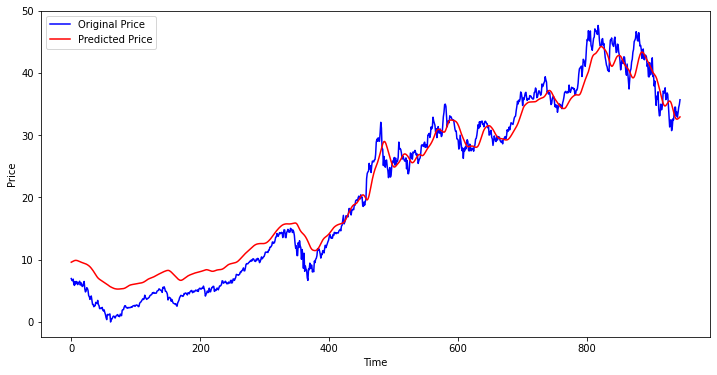

In [47]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()